In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load DataFrame
df = pd.read_csv(r"C:\Users\Dell\Downloads\Codebasics\1_Linear_regression\Exercise\canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [3]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [4]:
df.isna().sum()

year                       0
per capita income (US$)    0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


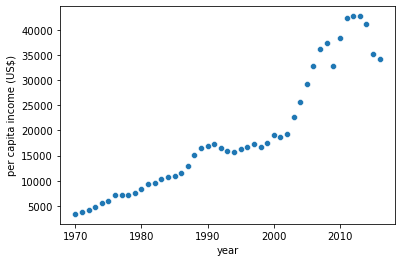

In [5]:
# Dataset shows increasing behaviour.
sns.scatterplot(df["year"],df["per capita income (US$)"]);

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
x = df[["year"]]
y = df["per capita income (US$)"]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='per capita income (US$)'>

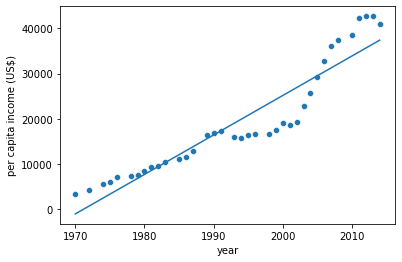

In [12]:
sns.scatterplot(x_train["year"],y_train)
sns.lineplot(x_train["year"],y_train_pred)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='per capita income (US$)'>

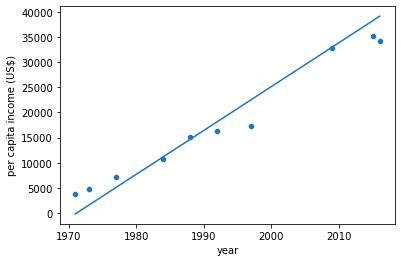

In [13]:
sns.scatterplot(x_test["year"],y_test)
sns.lineplot(x_test["year"],y_test_pred)

In [14]:
# Coefficient and Intercept of the best fitted line.
print(lr.coef_)
print(lr.intercept_)

[872.9950454]
-1720829.4881313362


In [15]:
# finding the r2 score value for the predicted values.
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8774991447715641
0.9294323797354248


In [16]:
# Calculating mean square error of the predicted from actual values.
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

17581619.81406916
9416528.493975913


# Linear Regression from Scratch

In [17]:
# make a class of Linear Regression Algorithm by name Lr.
class Lr:
    
    def __init__(self):
        self.m = None
        self.b = None
    
    def fit(self,x_train,y_train):
        X = np.insert(x_train.values,0,1,axis=1)
        constant = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y_train)
        self.coeff_ = constant[1:]
        self.intercept_ = constant[0]
        
    def predict(self,x_test):
        y_pred = (np.dot(x_test,self.coeff_) + self.intercept_)
        return y_pred

In [18]:
# make a object of Lr class and fit the data.
clf = Lr()
clf.fit(x_train,y_train)

In [19]:
# Claculating coefficient and intercept of line obtained by Linear Regression algorithm by using above class and scikit-learn.
print(clf.intercept_)
lr.intercept_

-1720829.4881313704


-1720829.4881313362

In [20]:
print(clf.coeff_)
lr.coef_

[872.9950454]


array([872.9950454])

In [21]:
# y_test predict by above class and scikit-learn Linear regression.
print(clf.predict(x_test))
y_test_pred

[39128.52339069 14684.66211955 38255.52834529 33017.5580729
 18176.64230114  -156.25365221 22541.61752813  1589.73643858
  5081.71662017 11192.68193796]


array([39128.52339074, 14684.6621196 , 38255.52834534, 33017.55807296,
       18176.64230119,  -156.25365216, 22541.61752818,  1589.73643863,
        5081.71662022, 11192.68193801])